**IMPORTANTE**  
Este ejercicio está dividido en cuatro partes, esta es la parte número 2.  
Para ir a las otras partes:  
- [Parte 1](Parte1_PCA1COMPONENTE.ipynb)
- [Parte 3](Parte3_LDA1COMPONENTE.ipynb)
- [Parte 4](Parte4_LDA2COMPONENTES_y_Conclusiones.ipynb)


In [1]:
from sklearn import datasets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

## Carga de datos

In [2]:
# Datos en bruto
data = datasets.load_wine()

### Creación del dataset

In [3]:
df_wine = pd.DataFrame(data=data.data, columns=data.feature_names)
df_wine['target'] = data.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df_wine.shape

(178, 14)

In [5]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## Exploración de datos

Vemos que columnas tenemos

In [6]:
print(df_wine.keys())

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


El código para generar el pairplot sería  
sns.pairplot(df_wine, hue='target', palette='tab10')  
plt.show()

Como tarda más de un minuto en cargar, se ha guardado la imagen  

![pairplot_wine](pairplot_wine.png)

# PCA 2 Componentes

## Preprocesamiento de datos
### Selección de datos

In [7]:
# Seleccionamos las características a tener en cuenta para crear el modelo
X = df_wine.drop('target', axis=1)

# Defino los datos correspondientes a las etiquetas
y = df_wine['target']

## División de datos (conjuntos de entrenamiento y de prueba)

In [8]:
# Dividimos los datos de "entrenamiento" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Dividimos los datos de entrenamiento en desarrollo y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [9]:
X_plot = X_train.copy()
X_plot['target'] = y_train


### Normalización de los datos
#### MinMaxScaler

In [10]:
mmx = MinMaxScaler()
X_train_mmx = mmx.fit_transform(X_train)
X_test_mmx = mmx.transform(X_test)

In [11]:
X_plot = pd.DataFrame(X_train_mmx, columns=X_plot.columns[:-1], index=X_plot.index)
X_plot['target'] = y_train

### StandardScaler

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_plot = pd.DataFrame(X_train, columns=X_plot.columns[:-1], index=X_plot.index)
X_plot['target'] = y_train

In [14]:
# Utilizamos todas las características
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
# Exploramos la varianza que produce cada una de las variables
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.38797538, 0.1934744 , 0.10448326, 0.0677037 , 0.06045409,
       0.0465736 , 0.03999145, 0.02415218, 0.02254618, 0.01880901,
       0.01649782, 0.01175429, 0.00558466])

Vamos a intentar realizar un modelo de dos componentes ya que con dos componentes explicamos el 58,14% de los datos

In [17]:
pca = PCA(n_components=2) # 0.81
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [18]:
pca.explained_variance_ratio_

array([0.66725518, 0.33274482])

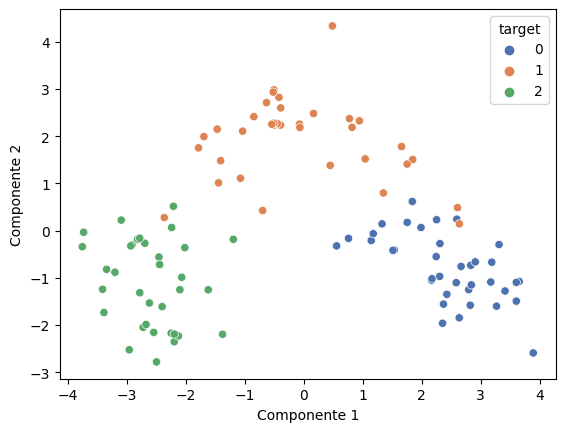

In [19]:
X_plot = pd.DataFrame(X_train, columns=['Componente 1', 'Componente 2'], index=X_plot.index)
X_plot['y'] = 0
X_plot['target'] = y_train

sns.scatterplot(x='Componente 1', y='Componente 2', data=X_plot, hue='target', palette='deep')
plt.show()

#### Creación del modelo

In [20]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

#### Predicción del modelo

In [21]:
y_pred = classifier.predict(X_test)

#### Validación de resultados

In [22]:
df_res = pd.DataFrame(columns=['Valor Real', 'Valor Predicho'])
df_res['Valor Real'] = y_val
df_res['Valor Predicho'] = y_pred
df_res['Acierto'] = (df_res['Valor Predicho']) == (df_res['Valor Real'])
df_res.head()

,Valor Real,Valor Predicho,Acierto
14,0,0,True
99,1,2,False
62,1,1,True
30,0,0,True
81,1,1,True


#### Evaluación del modelo

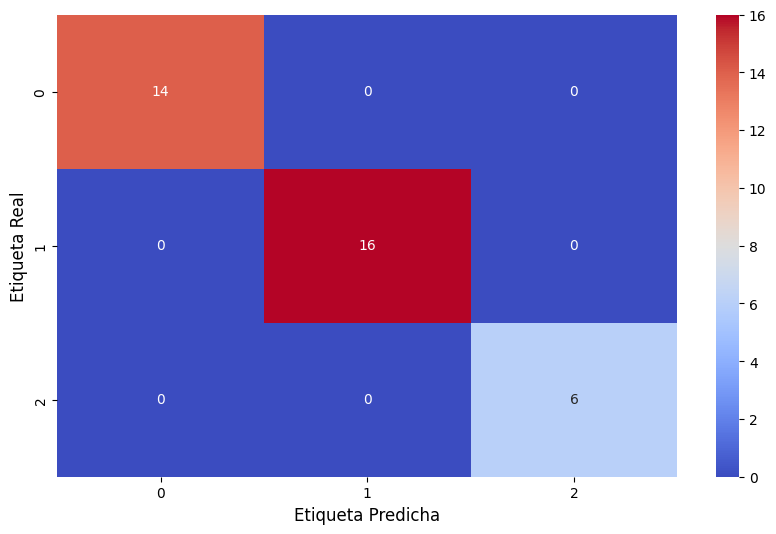

In [23]:
# Matriz de confusión
cf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
shm = sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', ax=ax)
shm.set_xlabel('Etiqueta Predicha', fontsize=12)
shm.set_ylabel('Etiqueta Real', fontsize=12)
plt.show()

In [24]:
# Métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Añadiendo dos componentes, el modelo ha mejorado bastante,ya que es capaz de predecir un 100% de las clases.  
No obstante, vamos a ver que ocurre con el modelo de LDA de un componente
- [Parte 3](Parte3_LDA1COMPONENTE.ipynb)